# Importing Datasets

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

!kaggle datasets download -d rdxesss/covid19-rd

!unzip \*.zip && rm *.zip

Importing necessary packages

In [ ]:
# Install for spliting folder
!pip install split-folders
!pip install split-folders tqdm

In [ ]:
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras


import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


import shutil
import splitfolders
import zipfile,os
import pandas as pd

from sklearn.model_selection import train_test_split
from google.colab import files
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
#3 class
splitfolders.ratio('/content/COVID-19_Radiography_Dataset/', output="/content/COVID-19_Radiography_Dataset/output_result", ratio=(.7, .2, .1))

Copying files: 15153 files [00:04, 3521.24 files/s]


Loading dataset

In [ ]:
#resnet and nasnet 224 and 331
img_width, img_height = 224,224
train_data_dir = '/content/COVID-19_Radiography_Dataset/output_result/train'
validation_data_dir = '/content/COVID-19_Radiography_Dataset/output_result/val'
test_data_dir = '/content/COVID-19_Radiography_Dataset/output_result/test'
batch_size = 32

Data augmentation

In [ ]:
#data augmentation

datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    # validation_split=0.2
    )

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    # subset="training",
    class_mode='categorical',     #binary
)




val_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    # validation_split=0.2
    )

validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    # subset="validation",
    class_mode='categorical'      #binary
)


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    # subset="validation",
    class_mode='categorical'      #binary
)

Found 10606 images belonging to 3 classes.
Found 3030 images belonging to 3 classes.
Found 1517 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'COVID': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
validation_generator.class_indices

{'COVID': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
test_generator.class_indices

{'COVID': 0, 'Normal': 1, 'Viral Pneumonia': 2}

# Xception...

In [ ]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(240, 240, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(240, 240, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(3)(x)
model = keras.Model(inputs, outputs)

Model Training

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint


# # Define callbacks for learning rate scheduling, logging and best checkpoints saving
callbackss = [
    ModelCheckpoint('/content/drive/MyDrive/Classification/Radiography database/Models/Xception/Xception.h5', monitor='val_categorical_accuracy', save_best_only=True, mode='max'),
#     ReduceLROnPlateau(monitor='val_Dice_coef', factor=0.1, verbose=1, patience=5, mode='max'), ## new_lr = lr * factor # 5
#     EarlyStopping(monitor='val_Dice_coef', min_delta=0, verbose=1, patience=15, mode='max', restore_best_weights=True), # 8
    CSVLogger('/content/drive/MyDrive/Classification/Radiography database/CSV/Xception.csv',  separator=",")
]

In [ ]:
from keras.callbacks import History
history = History()


model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.fit_generator(train_generator,
      epochs=10,callbacks=[history],
      validation_data=validation_generator,
      validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
332/332 [==============================] - 202s 593ms/step - loss: 0.4425 - categorical_accuracy: 0.8222 - val_loss: 0.4146 - val_categorical_accuracy: 0.8438
Epoch 2/10
332/332 [==============================] - 196s 591ms/step - loss: 0.3472 - categorical_accuracy: 0.8630 - val_loss: 0.3297 - val_categorical_accuracy: 0.8656
Epoch 3/10
332/332 [==============================] - 195s 586ms/step - loss: 0.3164 - categorical_accuracy: 0.8789 - val_loss: 0.3186 - val_categorical_accuracy: 0.8750
Epoch 4/10
332/332 [==============================] - 195s 588ms/step - loss: 0.3087 - categorical_accuracy: 0.8803 - val_loss: 0.2938 - val_categorical_accuracy: 0.8813
Epoch 5/10
332/332 [==============================] - 195s 587ms/step - loss: 0.2966 - categorical_accuracy: 0.8886 - val_loss: 0.3423 - val_categorical_accuracy: 0.8594
Epoch 6/10
332/332 [==============================] - 193s 581ms/step - loss: 0.2909 - categorical_accuracy: 0.8867 - val_loss: 0.2817 - val_categoric

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2691879868507385, 0.8942108154296875]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2697725296020508, 0.8924092650413513]

In [ ]:
model.evaluate(test_generator)

76/76 [==============================] - 31s 399ms/step - loss: 0.2799 - categorical_accuracy: 0.8939


[0.279920369386673, 0.8938694596290588]

Plooting the results


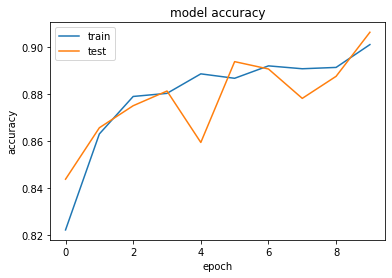

In [ ]:
#plooting the results

import matplotlib.pyplot as plt

#summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

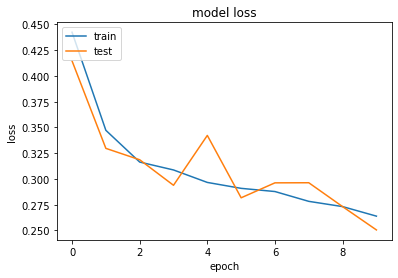

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Validtion & Confusion Matrix

Found 1517 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


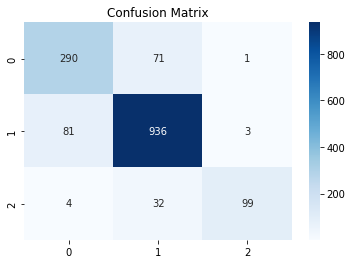

In [ ]:
test_generator = datagen.flow_from_directory(
    directory = test_data_dir,
    class_mode='categorical',
   #seed = 42,
    batch_size = 20, 
    shuffle = False,
    # subset = 'validation'
)

# Obtain predictions
pred = model.predict_generator(test_generator) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = test_generator.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])
sns.heatmap(
    cm, 
    cmap="Blues",
    annot = True, 
    fmt = "d"
)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       362
           1       0.90      0.92      0.91      1020
           2       0.96      0.73      0.83       135

    accuracy                           0.87      1517
   macro avg       0.88      0.82      0.84      1517
weighted avg       0.88      0.87      0.87      1517



# Resnet101V2...

In [ ]:
base_model = keras.applications.ResNet101V2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(240, 240, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

171327488/171317808 [==============================] - 2s 0us/step


In [ ]:
base_model.summary()

In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(240, 240, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(3)(x)
model = keras.Model(inputs, outputs)

Model Training

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint


# # Define callbacks for learning rate scheduling, logging and best checkpoints saving
callbackss = [
    ModelCheckpoint('/content/drive/MyDrive/Classification/Radiography database/Models/ResNet101V2/ResNet101V2.h5', monitor='val_categorical_accuracy', save_best_only=True, mode='max'),
#     ReduceLROnPlateau(monitor='val_Dice_coef', factor=0.1, verbose=1, patience=5, mode='max'), ## new_lr = lr * factor # 5
#     EarlyStopping(monitor='val_Dice_coef', min_delta=0, verbose=1, patience=15, mode='max', restore_best_weights=True), # 8
    CSVLogger('/content/drive/MyDrive/Classification/Radiography database/CSV/ResNet101V2.csv',  separator=",")
]

In [ ]:
from keras.callbacks import History
history = History()


model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.fit_generator(train_generator,
      epochs=10,callbacks=[history, callbackss],
      validation_data=validation_generator,
      validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
332/332 [==============================] - 217s 630ms/step - loss: 0.4069 - categorical_accuracy: 0.8396 - val_loss: 0.8023 - val_categorical_accuracy: 0.6450
Epoch 2/10
332/332 [==============================] - 205s 617ms/step - loss: 0.3035 - categorical_accuracy: 0.8833 - val_loss: 0.8362 - val_categorical_accuracy: 0.6500
Epoch 3/10
332/332 [==============================] - 206s 620ms/step - loss: 0.2680 - categorical_accuracy: 0.8963 - val_loss: 0.4425 - val_categorical_accuracy: 0.8000
Epoch 4/10
332/332 [==============================] - 204s 614ms/step - loss: 0.2675 - categorical_accuracy: 0.9012 - val_loss: 0.4727 - val_categorical_accuracy: 0.7900
Epoch 5/10
332/332 [==============================] - 204s 613ms/step - loss: 0.2463 - categorical_accuracy: 0.9043 - val_loss: 0.6377 - val_categorical_accuracy: 0.7500
Epoch 6/10
332/332 [==============================] - 203s 611ms/step - loss: 0.2423 - categorical_accuracy: 0.9059 - val_loss: 0.5763 - val_categoric

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2378748208284378, 0.909390926361084]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.26989713311195374, 0.8965062499046326]

In [ ]:
model.evaluate(test_generator)

76/76 [==============================] - 32s 424ms/step - loss: 0.2657 - categorical_accuracy: 0.9011


[0.2656877636909485, 0.9011206030845642]

Plooting the results


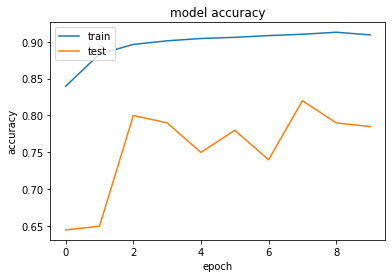

In [ ]:
#plooting the results

import matplotlib.pyplot as plt

#summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

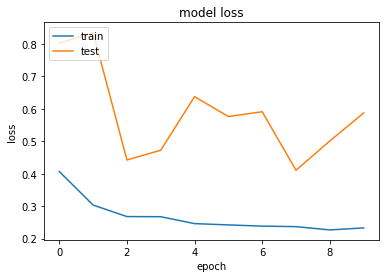

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Validtion & Confusion Matrix

Found 1517 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


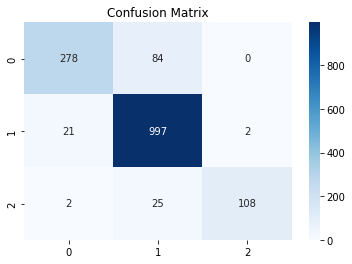

In [ ]:
test_generator = datagen.flow_from_directory(
    directory = test_data_dir,
    class_mode='categorical',
   #seed = 42,
    batch_size = 20, 
    shuffle = False,
    # subset = 'validation'
)

# Obtain predictions
pred = model.predict_generator(test_generator) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = test_generator.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])
sns.heatmap(
    cm, 
    cmap="Blues",
    annot = True, 
    fmt = "d"
)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       362
           1       0.90      0.98      0.94      1020
           2       0.98      0.80      0.88       135

    accuracy                           0.91      1517
   macro avg       0.94      0.85      0.89      1517
weighted avg       0.91      0.91      0.91      1517



# ResNet50V2

In [ ]:
base_model = keras.applications.ResNet50V2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(240, 240, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(240, 240, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(3)(x)
model = keras.Model(inputs, outputs)

Model Training

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint


# # Define callbacks for learning rate scheduling, logging and best checkpoints saving
callbackss = [
    ModelCheckpoint('/content/drive/MyDrive/Classification/Radiography database/Models/ResNet50V2/ResNet50V2.h5', monitor='val_categorical_accuracy', save_best_only=True, mode='max'),
#     ReduceLROnPlateau(monitor='val_Dice_coef', factor=0.1, verbose=1, patience=5, mode='max'), ## new_lr = lr * factor # 5
#     EarlyStopping(monitor='val_Dice_coef', min_delta=0, verbose=1, patience=15, mode='max', restore_best_weights=True), # 8
    CSVLogger('/content/drive/MyDrive/Classification/Radiography database/CSV/ResNet50V2.csv',  separator=",")
]

In [ ]:
from keras.callbacks import History
history = History()


model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.fit_generator(train_generator,
      epochs=10,callbacks=[history, callbackss],
      validation_data=validation_generator,
      validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
332/332 [==============================] - 213s 621ms/step - loss: 0.2291 - categorical_accuracy: 0.9111 - val_loss: 0.2324 - val_categorical_accuracy: 0.9125


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
332/332 [==============================] - 202s 608ms/step - loss: 0.2225 - categorical_accuracy: 0.9165 - val_loss: 0.2436 - val_categorical_accuracy: 0.9062
Epoch 3/10
332/332 [==============================] - 203s 611ms/step - loss: 0.2210 - categorical_accuracy: 0.9167 - val_loss: 0.2302 - val_categorical_accuracy: 0.9125
Epoch 4/10
332/332 [==============================] - 204s 614ms/step - loss: 0.2226 - categorical_accuracy: 0.9144 - val_loss: 0.2384 - val_categorical_accuracy: 0.9156
Epoch 5/10
332/332 [==============================] - 204s 612ms/step - loss: 0.2204 - categorical_accuracy: 0.9172 - val_loss: 0.1537 - val_categorical_accuracy: 0.9563
Epoch 6/10
332/332 [==============================] - 203s 610ms/step - loss: 0.2124 - categorical_accuracy: 0.9194 - val_loss: 0.2079 - val_categorical_accuracy: 0.9219
Epoch 7/10
332/332 [==============================] - 206s 620ms/step - loss: 0.2233 - categorical_accuracy: 0.9133 - val_loss: 0.2003 - val_categoric

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2094460278749466, 0.9208938479423523]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2287018597126007, 0.9108911156654358]

In [ ]:
model.evaluate(test_generator)

48/48 [==============================] - 30s 614ms/step - loss: 0.2285 - categorical_accuracy: 0.9176


[0.22848941385746002, 0.9176005125045776]

Plooting the results


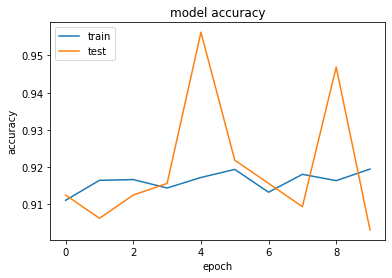

In [ ]:
#plooting the results

import matplotlib.pyplot as plt

#summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

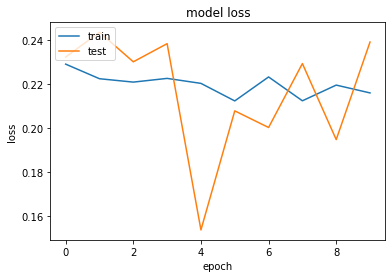

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Validtion & Confusion Matrix

Found 1517 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


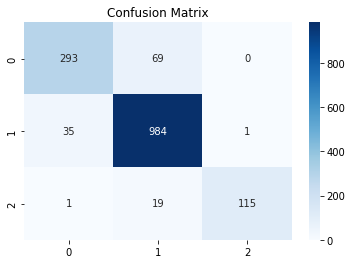

In [ ]:
test_generator = datagen.flow_from_directory(
    directory = test_data_dir,
    class_mode='categorical',
   #seed = 42,
    batch_size = 20, 
    shuffle = False,
    # subset = 'validation'
)

# Obtain predictions
pred = model.predict_generator(test_generator) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = test_generator.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])
sns.heatmap(
    cm, 
    cmap="Blues",
    annot = True, 
    fmt = "d"
)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       362
           1       0.92      0.96      0.94      1020
           2       0.99      0.85      0.92       135

    accuracy                           0.92      1517
   macro avg       0.93      0.88      0.90      1517
weighted avg       0.92      0.92      0.92      1517



# EfficientnetB0

In [ ]:
base_model = keras.applications.EfficientNetB0(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(240, 240, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(240, 240, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(3)(x)
model = keras.Model(inputs, outputs)

Model Training

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint


# # Define callbacks for learning rate scheduling, logging and best checkpoints saving
callbackss = [
    ModelCheckpoint('/content/drive/MyDrive/Classification/Radiography database/Models/EfficientNetB0/EfficientNetB0.h5', monitor='val_categorical_accuracy', save_best_only=True, mode='max'),
#     ReduceLROnPlateau(monitor='val_Dice_coef', factor=0.1, verbose=1, patience=5, mode='max'), ## new_lr = lr * factor # 5
#     EarlyStopping(monitor='val_Dice_coef', min_delta=0, verbose=1, patience=15, mode='max', restore_best_weights=True), # 8
    CSVLogger('/content/drive/MyDrive/Classification/Radiography database/CSV/EfficientNetB0.csv',  separator=",")
]

In [ ]:
from keras.callbacks import History
history = History()


model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.fit_generator(train_generator,
      epochs=10,callbacks=[history, callbackss],
      validation_data=validation_generator,
      validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
332/332 [==============================] - 632s 2s/step - loss: 0.8345 - categorical_accuracy: 0.6697 - val_loss: 0.8711 - val_categorical_accuracy: 0.6375


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
332/332 [==============================] - 619s 2s/step - loss: 0.8298 - categorical_accuracy: 0.6726 - val_loss: 0.7584 - val_categorical_accuracy: 0.7188
Epoch 3/10
332/332 [==============================] - 611s 2s/step - loss: 0.8280 - categorical_accuracy: 0.6726 - val_loss: 0.7870 - val_categorical_accuracy: 0.7063
Epoch 4/10
332/332 [==============================] - 633s 2s/step - loss: 0.8275 - categorical_accuracy: 0.6726 - val_loss: 0.8506 - val_categorical_accuracy: 0.6594
Epoch 5/10
332/332 [==============================] - 688s 2s/step - loss: 0.8285 - categorical_accuracy: 0.6726 - val_loss: 0.7919 - val_categorical_accuracy: 0.6719
Epoch 6/10
332/332 [==============================] - 696s 2s/step - loss: 0.8279 - categorical_accuracy: 0.6726 - val_loss: 0.7895 - val_categorical_accuracy: 0.6969
Epoch 7/10
332/332 [==============================] - 674s 2s/step - loss: 0.8266 - categorical_accuracy: 0.6726 - val_loss: 0.8233 - val_categorical_accuracy: 0.671

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.8419058918952942, 0.6726381182670593]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.8418471813201904, 0.6726072430610657]

In [ ]:
model.evaluate(test_generator)

48/48 [==============================] - 91s 2s/step - loss: 0.8425 - categorical_accuracy: 0.6724


[0.8424680829048157, 0.6723796725273132]

Plooting the results


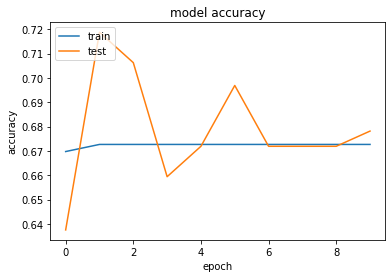

In [ ]:
#plooting the results

import matplotlib.pyplot as plt

#summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

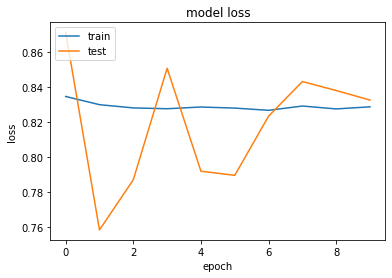

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Validtion & Confusion Matrix

Found 1517 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


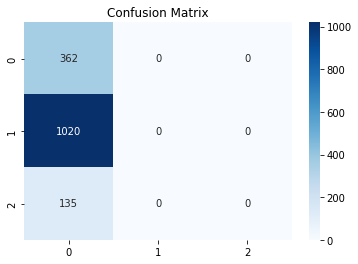

In [ ]:
test_generator = datagen.flow_from_directory(
    directory = test_data_dir,
    class_mode='categorical',
   #seed = 42,
    batch_size = 20, 
    shuffle = False,
    # subset = 'validation'
)

# Obtain predictions
pred = model.predict_generator(test_generator) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = test_generator.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])
sns.heatmap(
    cm, 
    cmap="Blues",
    annot = True, 
    fmt = "d"
)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))

# MobileNetV2

In [ ]:
base_model = keras.applications.MobileNetV2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(240, 240, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [ ]:
base_model.summary()

In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(240, 240, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(3)(x)
model = keras.Model(inputs, outputs)

Model Training

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint


# # Define callbacks for learning rate scheduling, logging and best checkpoints saving
callbackss = [
    ModelCheckpoint('/content/drive/MyDrive/Classification/Radiography database/Models/MobileNetV2/MobileNetV2.h5', monitor='val_categorical_accuracy', save_best_only=True, mode='max'),
#     ReduceLROnPlateau(monitor='val_Dice_coef', factor=0.1, verbose=1, patience=5, mode='max'), ## new_lr = lr * factor # 5
#     EarlyStopping(monitor='val_Dice_coef', min_delta=0, verbose=1, patience=15, mode='max', restore_best_weights=True), # 8
    CSVLogger('/content/drive/MyDrive/Classification/Radiography database/CSV/MobileNetV2.csv',  separator=",")
]

In [ ]:
from keras.callbacks import History
history = History()


model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.fit_generator(train_generator,
      epochs=10,callbacks=[history, callbackss],
      validation_data=validation_generator,
      validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
332/332 [==============================] - 448s 1s/step - loss: 0.3958 - categorical_accuracy: 0.8414 - val_loss: 0.2791 - val_categorical_accuracy: 0.8938


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
332/332 [==============================] - 450s 1s/step - loss: 0.3051 - categorical_accuracy: 0.8787 - val_loss: 0.2605 - val_categorical_accuracy: 0.8938
Epoch 3/10
332/332 [==============================] - 458s 1s/step - loss: 0.2715 - categorical_accuracy: 0.8936 - val_loss: 0.2739 - val_categorical_accuracy: 0.9062
Epoch 4/10
332/332 [==============================] - 455s 1s/step - loss: 0.2591 - categorical_accuracy: 0.8984 - val_loss: 0.2632 - val_categorical_accuracy: 0.8969
Epoch 5/10
332/332 [==============================] - 459s 1s/step - loss: 0.2571 - categorical_accuracy: 0.8981 - val_loss: 0.2124 - val_categorical_accuracy: 0.9250
Epoch 6/10
332/332 [==============================] - 460s 1s/step - loss: 0.2439 - categorical_accuracy: 0.9075 - val_loss: 0.2221 - val_categorical_accuracy: 0.9125
Epoch 7/10
332/332 [==============================] - 461s 1s/step - loss: 0.2490 - categorical_accuracy: 0.9033 - val_loss: 0.2261 - val_categorical_accuracy: 0.906

In [ ]:
print(history.history.keys())

In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2217945009469986, 0.9185366630554199]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.21694116294384003, 0.9188118577003479]

In [ ]:
model.evaluate(test_generator)

48/48 [==============================] - 62s 1s/step - loss: 0.2303 - categorical_accuracy: 0.9117


[0.2302805781364441, 0.9116677641868591]

Plooting the results


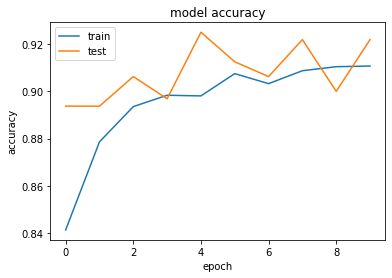

In [ ]:
#plooting the results

import matplotlib.pyplot as plt

#summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

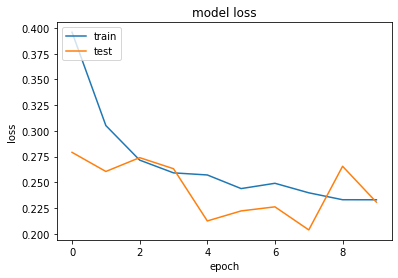

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Validtion & Confusion Matrix

Found 1517 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


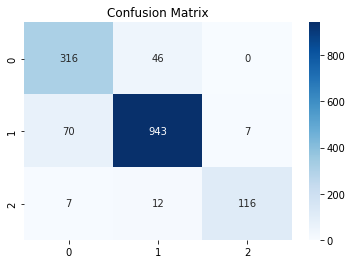

In [ ]:
test_generator = datagen.flow_from_directory(
    directory = test_data_dir,
    class_mode='categorical',
   #seed = 42,
    batch_size = 20, 
    shuffle = False,
    # subset = 'validation'
)

# Obtain predictions
pred = model.predict_generator(test_generator) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = test_generator.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])
sns.heatmap(
    cm, 
    cmap="Blues",
    annot = True, 
    fmt = "d"
)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       362
           1       0.94      0.92      0.93      1020
           2       0.94      0.86      0.90       135

    accuracy                           0.91      1517
   macro avg       0.90      0.89      0.89      1517
weighted avg       0.91      0.91      0.91      1517



# ResNet50

In [ ]:
base_model = keras.applications.MobileNetV2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

In [ ]:
base_model.trainable = False

In [ ]:
# inputs = keras.Input(shape=(240, 240, 3))
# # We make sure that the base_model is running in inference mode here,
# # by passing `training=False`. This is important for fine-tuning, as you will
# # learn in a few paragraphs.
# x = base_model(inputs, training=False)
# # Convert features of shape `base_model.output_shape[1:]` to vectors
# x = keras.layers.GlobalAveragePooling2D()(x)
# # A Dense classifier with a single unit (binary classification)
# outputs = keras.layers.Dense(3)(x)
# model = keras.Model(inputs, outputs)

In [ ]:
#resnet and nasnet 224 and 331

inputs = keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(3)(x)
model = keras.Model(inputs, outputs)

Model Training

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint


# # Define callbacks for learning rate scheduling, logging and best checkpoints saving
callbackss = [
    ModelCheckpoint('/content/drive/MyDrive/Classification/Radiography database/Models/ResNet50/ResNet50.h5', monitor='val_categorical_accuracy', save_best_only=True, mode='max'),
#     ReduceLROnPlateau(monitor='val_Dice_coef', factor=0.1, verbose=1, patience=5, mode='max'), ## new_lr = lr * factor # 5
#     EarlyStopping(monitor='val_Dice_coef', min_delta=0, verbose=1, patience=15, mode='max', restore_best_weights=True), # 8
    CSVLogger('/content/drive/MyDrive/Classification/Radiography database/CSV/ResNet50.csv',  separator=",")
]

In [ ]:
from keras.callbacks import History
history = History()


model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.fit_generator(train_generator,
      epochs=10,callbacks=[history, callbackss],
      validation_data=validation_generator,
      validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
332/332 [==============================] - 186s 465ms/step - loss: 0.4129 - categorical_accuracy: 0.8378 - val_loss: 0.3226 - val_categorical_accuracy: 0.8687


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
332/332 [==============================] - 150s 451ms/step - loss: 0.3027 - categorical_accuracy: 0.8814 - val_loss: 0.2214 - val_categorical_accuracy: 0.9125
Epoch 3/10
332/332 [==============================] - 148s 447ms/step - loss: 0.2809 - categorical_accuracy: 0.8895 - val_loss: 0.2177 - val_categorical_accuracy: 0.9219
Epoch 4/10
332/332 [==============================] - 152s 458ms/step - loss: 0.2702 - categorical_accuracy: 0.8994 - val_loss: 0.2810 - val_categorical_accuracy: 0.8844
Epoch 5/10
332/332 [==============================] - 152s 456ms/step - loss: 0.2581 - categorical_accuracy: 0.8985 - val_loss: 0.2078 - val_categorical_accuracy: 0.9219
Epoch 6/10
332/332 [==============================] - 153s 460ms/step - loss: 0.2540 - categorical_accuracy: 0.9017 - val_loss: 0.2158 - val_categorical_accuracy: 0.9344
Epoch 7/10
332/332 [==============================] - 151s 455ms/step - loss: 0.2488 - categorical_accuracy: 0.9054 - val_loss: 0.2588 - val_categoric

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.3231251835823059, 0.8696963787078857]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.32369139790534973, 0.8646864891052246]

In [ ]:
model.evaluate(test_generator)

76/76 [==============================] - 27s 360ms/step - loss: 0.3807 - categorical_accuracy: 0.8378


[0.38072025775909424, 0.837837815284729]

Plooting the results


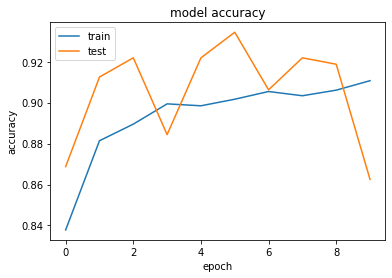

In [ ]:
#plooting the results

import matplotlib.pyplot as plt

#summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

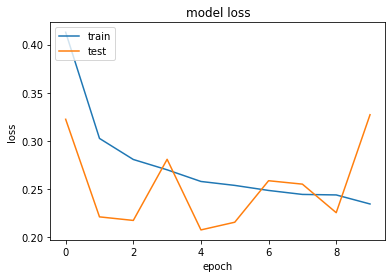

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Validtion & Confusion Matrix

Found 1517 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


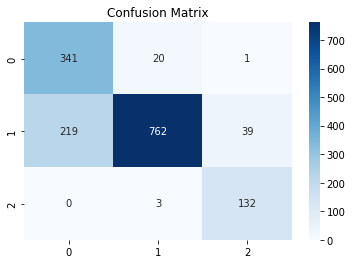

In [ ]:
test_generator = datagen.flow_from_directory(
    directory = test_data_dir,
    class_mode='categorical',
   #seed = 42,
    batch_size = 20, 
    shuffle = False,
    # subset = 'validation'
)

# Obtain predictions
pred = model.predict_generator(test_generator) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = test_generator.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])
sns.heatmap(
    cm, 
    cmap="Blues",
    annot = True, 
    fmt = "d"
)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.61      0.94      0.74       362
           1       0.97      0.75      0.84      1020
           2       0.77      0.98      0.86       135

    accuracy                           0.81      1517
   macro avg       0.78      0.89      0.81      1517
weighted avg       0.87      0.81      0.82      1517



# VGG19

In [ ]:
base_model = keras.applications.MobileNetV2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(240, 240, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [ ]:
base_model.summary()

In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(240, 240, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(3)(x)
model = keras.Model(inputs, outputs)

Model Training

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint


# # Define callbacks for learning rate scheduling, logging and best checkpoints saving
callbackss = [
    ModelCheckpoint('/content/drive/MyDrive/Classification/Radiography database/Models/VGG19/VGG19.h5', monitor='val_categorical_accuracy', save_best_only=True, mode='max'),
#     ReduceLROnPlateau(monitor='val_Dice_coef', factor=0.1, verbose=1, patience=5, mode='max'), ## new_lr = lr * factor # 5
#     EarlyStopping(monitor='val_Dice_coef', min_delta=0, verbose=1, patience=15, mode='max', restore_best_weights=True), # 8
    CSVLogger('/content/drive/MyDrive/Classification/Radiography database/CSV/VGG19.csv',  separator=",")
]

In [ ]:
from keras.callbacks import History
history = History()


model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.fit_generator(train_generator,
      epochs=10,callbacks=[history, callbackss],
      validation_data=validation_generator,
      validation_steps=10)

In [ ]:
print(history.history.keys())

In [ ]:
model.evaluate_generator(train_generator)

In [ ]:
model.evaluate_generator(validation_generator)

In [ ]:
model.evaluate(test_generator)

Plooting the results


In [ ]:
#plooting the results

import matplotlib.pyplot as plt

#summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Validtion & Confusion Matrix

In [ ]:
test_generator = datagen.flow_from_directory(
    directory = test_data_dir,
    class_mode='categorical',
   #seed = 42,
    batch_size = 20, 
    shuffle = False,
    # subset = 'validation'
)

# Obtain predictions
pred = model.predict_generator(test_generator) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = test_generator.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])
sns.heatmap(
    cm, 
    cmap="Blues",
    annot = True, 
    fmt = "d"
)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))

# Nasnetlarge

In [ ]:
base_model = keras.applications.NASNetLarge(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(331, 331, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

343621632/343610240 [==============================] - 4s 0us/step


In [ ]:
base_model.summary()

In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(331, 331, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(3)(x)
model = keras.Model(inputs, outputs)

Model Training

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint


# # Define callbacks for learning rate scheduling, logging and best checkpoints saving
callbackss = [
    ModelCheckpoint('/content/drive/MyDrive/Classification/Radiography database/Models/NASNetLarge/NASNetLarge.h5', monitor='val_categorical_accuracy', save_best_only=True, mode='max'),
#     ReduceLROnPlateau(monitor='val_Dice_coef', factor=0.1, verbose=1, patience=5, mode='max'), ## new_lr = lr * factor # 5
#     EarlyStopping(monitor='val_Dice_coef', min_delta=0, verbose=1, patience=15, mode='max', restore_best_weights=True), # 8
    CSVLogger('/content/drive/MyDrive/Classification/Radiography database/CSV/NASNetLarge.csv',  separator=",")
]

In [ ]:
from keras.callbacks import History
history = History()


model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.fit_generator(train_generator,
      epochs=10,callbacks=[history, callbackss],
      validation_data=validation_generator,
      validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
332/332 [==============================] - 344s 973ms/step - loss: 0.4020 - categorical_accuracy: 0.8348 - val_loss: 0.3000 - val_categorical_accuracy: 0.8719


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
332/332 [==============================] - 316s 950ms/step - loss: 0.3242 - categorical_accuracy: 0.8735 - val_loss: 0.3567 - val_categorical_accuracy: 0.8562
Epoch 3/10
332/332 [==============================] - 315s 948ms/step - loss: 0.3065 - categorical_accuracy: 0.8787 - val_loss: 0.2949 - val_categorical_accuracy: 0.8844
Epoch 4/10
332/332 [==============================] - 316s 949ms/step - loss: 0.2914 - categorical_accuracy: 0.8834 - val_loss: 0.2768 - val_categorical_accuracy: 0.9000
Epoch 5/10
332/332 [==============================] - 316s 950ms/step - loss: 0.2883 - categorical_accuracy: 0.8852 - val_loss: 0.3651 - val_categorical_accuracy: 0.8625
Epoch 6/10
332/332 [==============================] - 314s 946ms/step - loss: 0.2796 - categorical_accuracy: 0.8922 - val_loss: 0.2379 - val_categorical_accuracy: 0.8969
Epoch 7/10
332/332 [==============================] - 314s 943ms/step - loss: 0.2711 - categorical_accuracy: 0.8923 - val_loss: 0.2851 - val_categoric

In [ ]:
print(history.history.keys())

In [ ]:
model.evaluate_generator(train_generator)

[0.29115384817123413, 0.8863850831985474]

[0.29115384817123413, 0.8863850831985474]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2891027331352234, 0.8894389271736145]

In [ ]:
model.evaluate(test_generator)

76/76 [==============================] - 62s 809ms/step - loss: 0.3128 - categorical_accuracy: 0.8708


[0.31278571486473083, 0.8707976341247559]

Plooting the results


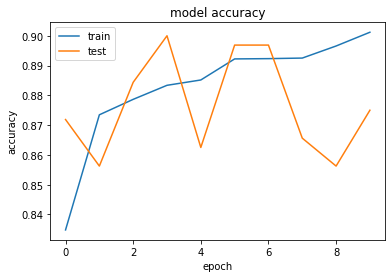

In [ ]:
#plooting the results

import matplotlib.pyplot as plt

#summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

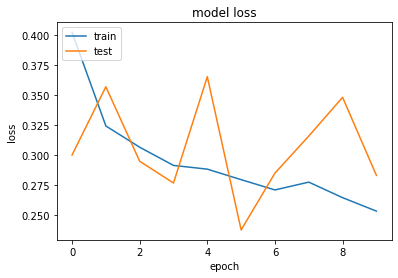

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Validtion & Confusion Matrix

Found 1517 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


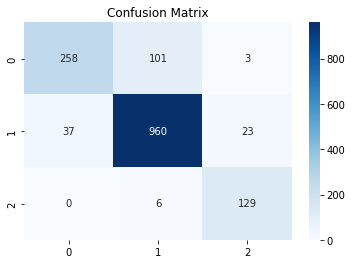

In [ ]:
test_generator = datagen.flow_from_directory(
    directory = test_data_dir,
    class_mode='categorical',
   #seed = 42,
    batch_size = 20, 
    shuffle = False,
    # subset = 'validation'
)

# Obtain predictions
pred = model.predict_generator(test_generator) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = test_generator.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])
sns.heatmap(
    cm, 
    cmap="Blues",
    annot = True, 
    fmt = "d"
)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.87      0.71      0.79       362
           1       0.90      0.94      0.92      1020
           2       0.83      0.96      0.89       135

    accuracy                           0.89      1517
   macro avg       0.87      0.87      0.87      1517
weighted avg       0.89      0.89      0.89      1517

